In [1]:
using PerlaTonettiWaugh

# Steady-State Comparison

In [2]:
params = parameter_defaults()
baseline = merge(params, (d = params.d_0,))
baseline_sol = stationary_algebraic(baseline, settings_defaults());

In [3]:
new_params = merge(params, (d = params.d_T,))
new_sol = stationary_algebraic(new_params, settings_defaults());

In [4]:
@show (new_sol.g, baseline_sol.g);

(new_sol.g, baseline_sol.g) = (0.010250822794505147, 0.007913401963163525)


In [5]:
@show (1 - new_sol.λ_ii, 1 - baseline_sol.λ_ii);

(1 - new_sol.λ_ii, 1 - baseline_sol.λ_ii) = (0.14442864132703293, 0.10629127170507902)


In [6]:
@show (new_sol.U_bar, baseline_sol.U_bar);

(new_sol.U_bar, baseline_sol.U_bar) = (17.534340776670454, 12.322561075850931)


In [7]:
@show consumption_equivalent(new_sol.U_bar, baseline_sol.U_bar, params);

consumption_equivalent(new_sol.U_bar, baseline_sol.U_bar, params) = 1.1118189950657014


# Transition Dynamics

In [8]:
using CSV, Plots, JSON, BenchmarkTools, Parameters, DataFrames, Suppressor
gr(fmt = :png)

Plots.GRBackend()

In [9]:
overall_parameters = parameter_defaults();

In [10]:
settings = settings_defaults(); # numerical solution settings
@unpack stationary_T, stationary_0, change_welfare, change_trade = compare_steady_states(overall_parameters, settings);

Note that everything from here on out is using the **numerical** solution, so the values might be slightly different than the algebraic one. 

We do this so that the endpoints are valid targets for the dynamical experiment. 

To use the algebraic one, simply add `algebraic = true` to the `compare_steady_states` function above. 

In [11]:
@show (stationary_T.g, stationary_T.z_hat, stationary_T.Ω, stationary_T.L_tilde); # inspect time T solution

(stationary_T.g, stationary_T.z_hat, stationary_T.Ω, stationary_T.L_tilde) = (0.010256161538783937, 1.852306240884716, 0.650813901046292, 0.24606267582509703)


In [12]:
@show (stationary_0.g, stationary_0.z_hat, stationary_0.Ω, stationary_0.L_tilde); # inspect time 0 solution

(stationary_0.g, stationary_0.z_hat, stationary_0.Ω, stationary_0.L_tilde) = (0.007920170474384551, 1.9881975410334118, 0.6852422606332954, 0.24226457898667364)


In [13]:
cachename = model_cachename(overall_parameters, settings) # uniquely identify the run by parameters + settings
cachepath = joinpath(pwd(), "data", cachename * ".csv")
use_cache = true # change this to false if you don't want to use the cache for a run
write_cache = true # change this to false if you don't want to generate *any* cache files for a run

true

In [14]:
cachename # this is the hash for this run

"11368798858269829579"

In [15]:
if isfile(cachepath) && use_cache # read if possible
    println("using cache.")
    solved = CSV.read(cachepath);
else
    println("solving without cache.")
    @time solution = @suppress solve_transition(overall_parameters, settings);
    solved = solution.results 
end

solving without cache.
406.096811 seconds (1.77 G allocations: 692.795 GiB, 31.71% gc time)


,t,g,z_hat,Ω,E,v_1,L_tilde,entry_residual
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-20.0,0.00792017,1.9882,0.685242,0.02,6.86678,0.242265,-1.5703e-12
2,-15.0,0.00792017,1.9882,0.685242,0.02,6.86678,0.242265,-1.5703e-12
3,-10.0,0.00792017,1.9882,0.685242,0.02,6.86678,0.242265,-1.5703e-12
4,-5.0,0.00792017,1.9882,0.685242,0.02,6.86678,0.242265,-1.5703e-12
5,-1.0,0.00792017,1.9882,0.685242,0.02,6.86678,0.242265,-1.5703e-12
6,0.0,0.00898345,1.87504,0.685242,0.0158639,6.86678,0.230633,0.0
7,0.25,0.00899196,1.87488,0.68493,0.0159106,6.86678,0.230821,0.0
8,0.5,0.00900046,1.87473,0.684619,0.015957,6.86678,0.231007,0.0
9,0.75,0.00900895,1.87457,0.684309,0.0160032,6.86678,0.231192,0.0


In [16]:
if write_cache
    mkpath(joinpath(pwd(), "data")) # if this doesn't eist for whatever reason
    CSV.write(cachepath, solved) # write DataFrame
    write(joinpath(pwd(), "data", cachename * ".json"), JSON.json((parameters = overall_parameters, settings = merge(settings, (interp = typeof(settings.interp), stationary_x0 = typeof(settings.stationary_x0), fixedpoint_x0 = typeof(settings.fixedpoint_x0) ))))) # write parameters
else
    # nothing
end

6329

In [17]:
filter!(row -> row.t >= 0, solved) # don't plot pre-shock values

,t,g,z_hat,Ω,E,v_1,L_tilde,entry_residual
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.00898345,1.87504,0.685242,0.0158639,6.86678,0.230633,0.0
2,0.25,0.00899196,1.87488,0.68493,0.0159106,6.86678,0.230821,0.0
3,0.5,0.00900046,1.87473,0.684619,0.015957,6.86678,0.231007,0.0
4,0.75,0.00900895,1.87457,0.684309,0.0160032,6.86678,0.231192,0.0
5,1.0,0.00901743,1.87442,0.684001,0.0160491,6.86678,0.231376,0.0
6,1.25,0.00902589,1.87427,0.683694,0.0160947,6.86678,0.231558,0.0
7,1.5,0.00903435,1.87411,0.683389,0.0161401,6.86678,0.23174,0.0
8,1.75,0.00904279,1.87396,0.683086,0.0161852,6.86678,0.23192,0.0
9,2.0,0.00905121,1.8738,0.682784,0.01623,6.86678,0.232098,0.0


## Welfare

Here's welfare inclusive of the transition path:

In [18]:
lambda_tpath = 100*(consumption_equivalent(solved.U[1], stationary_0.U_bar, parameter_defaults())-1);
@show lambda_tpath;

lambda_tpath = 10.802138499390734


## Plots

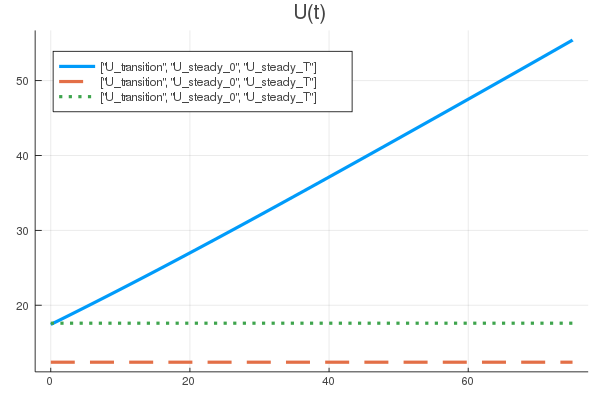

In [19]:
U_steady_0(t) = stationary_0.U_bar
U_steady_T(t) = stationary_T.U_bar

plot(solved.t,
   [solved.U, U_steady_0, U_steady_T],
   label = ["U_transition", "U_steady_0", "U_steady_T"] ,
   title = "U(t)", linestyle = :auto, lw = 3,
   legend = :topleft)

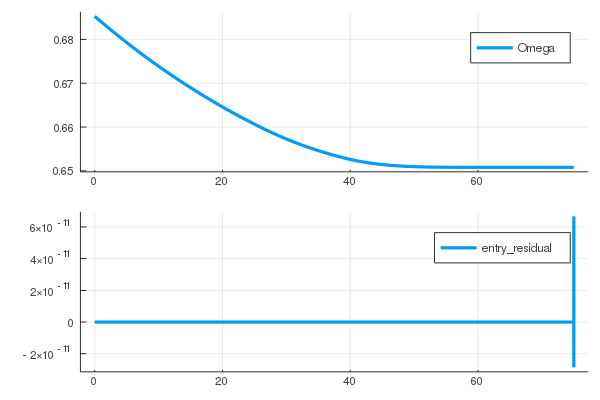

In [20]:
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

Here are the static equations.

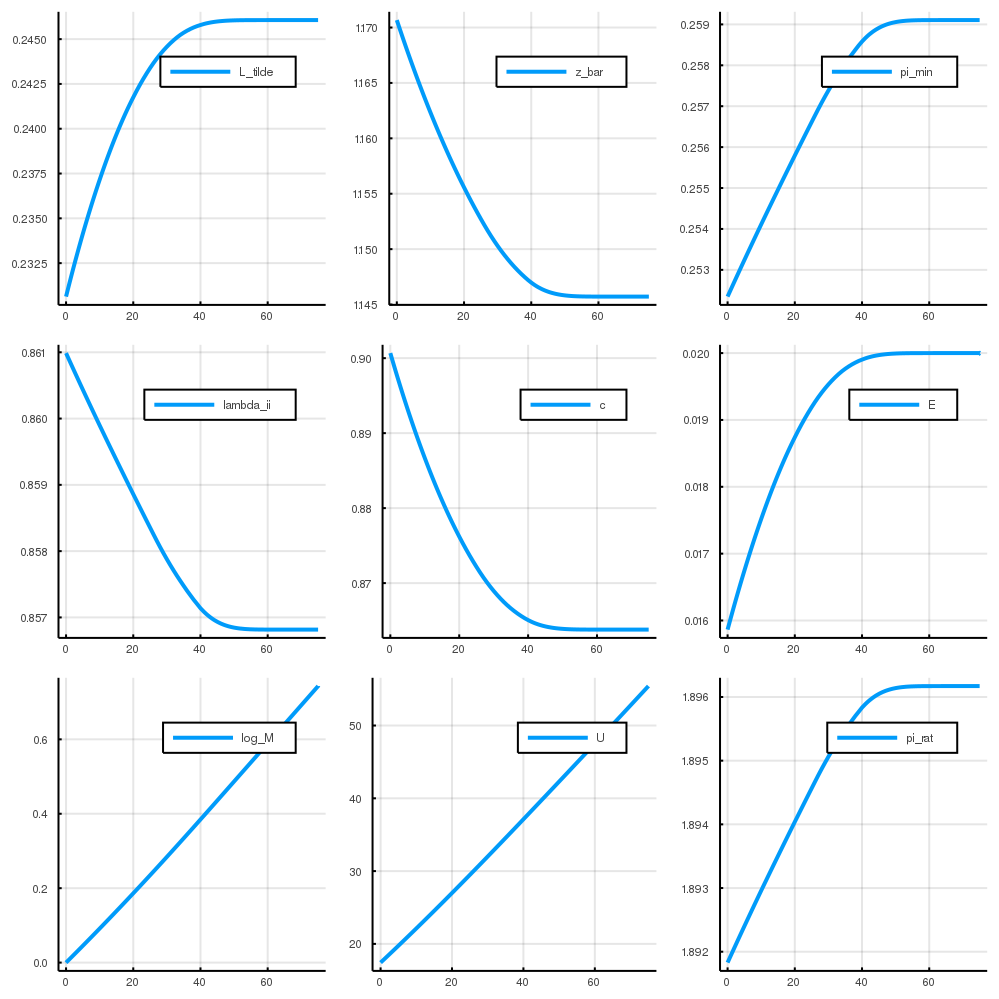

In [21]:
plot1 = plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)
plot3 = plot(solved.t, solved.π_min, label = "pi_min", lw = 3)
plot4 = plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(solved.t, solved.c, label = "c", lw = 3)
plot6 = plot(solved.t, solved.E, label = "E", lw = 3)
plot7 = plot(solved.t, solved.log_M, label = "log_M", lw = 3)
plot8 = plot(solved.t, solved.U, label = "U", lw = 3)
plot9 = plot(solved.t, solved.π_rat, label = "pi_rat", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, layout=(3,3), size = (1000, 1000))

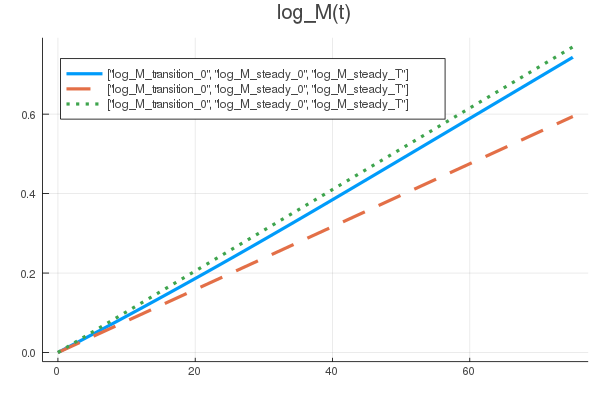

In [22]:
log_M_steady_0(t) = stationary_0.g * t
log_M_steady_T(t) = stationary_T.g * t

plot(solved.t,
    [solved.log_M, log_M_steady_0, log_M_steady_T],
    label = ["log_M_transition_0", "log_M_steady_0", "log_M_steady_T"] ,
    title = "log_M(t)", linestyle = :auto, lw = 3, legend = :topleft)

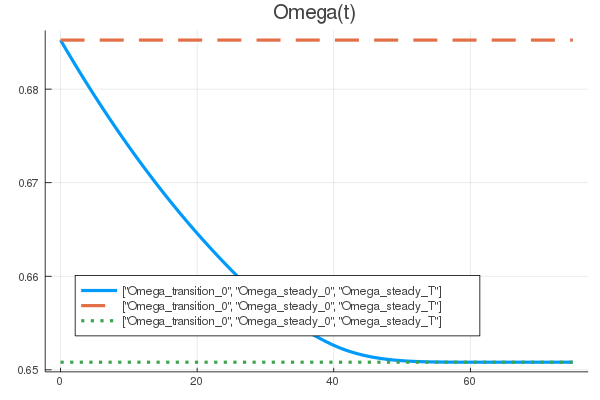

In [23]:
Ω_steady_0(t) = stationary_0.Ω
Ω_steady_T(t) = stationary_T.Ω

plot(solved.t,
    [solved.Ω, Ω_steady_0, Ω_steady_T],
    label = ["Omega_transition_0", "Omega_steady_0", "Omega_steady_T"] ,
    title = "Omega(t)", linestyle = :auto, lw = 3, legend = :bottom)

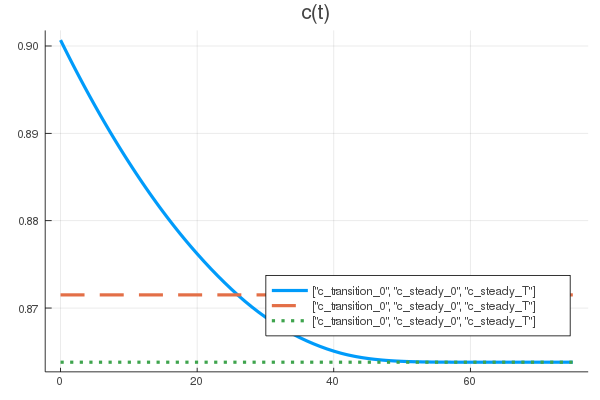

In [24]:
c_steady_0(t) = stationary_0.c
c_steady_T(t) = stationary_T.c

plot(solved.t,
    [solved.c, c_steady_0, c_steady_T],
    label = ["c_transition_0", "c_steady_0", "c_steady_T"] ,
    title = "c(t)", linestyle = :auto, lw = 3, legend = :bottomright)

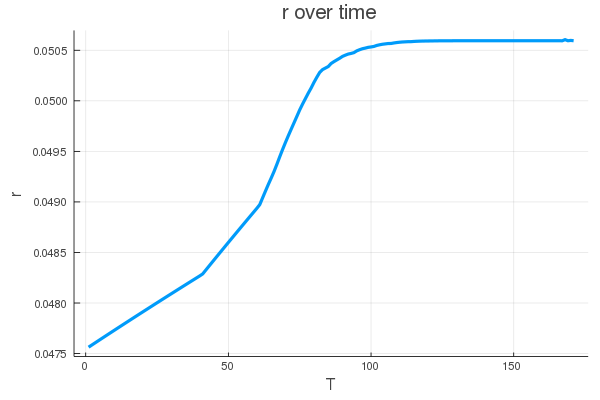

In [25]:
plot(solved.r, legend = false, title = "r over time", xlabel = "T", ylabel = "r", lw = 3)

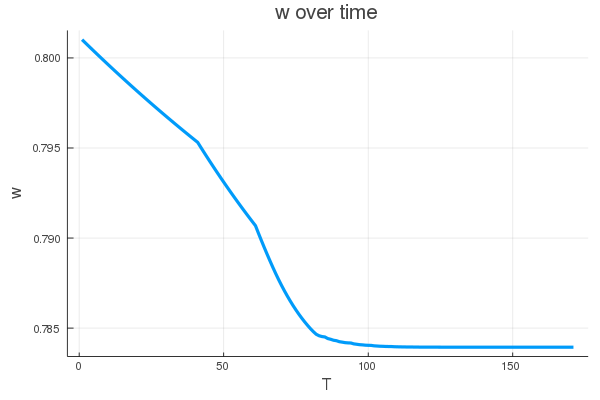

In [26]:
plot(solved.w, legend = false, title = "w over time", xlabel = "T", ylabel = "w", lw = 3)

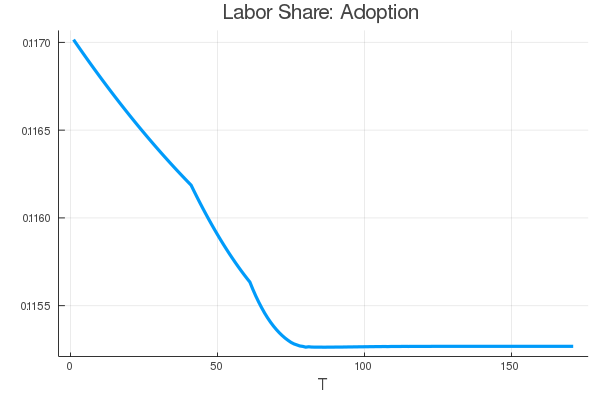

In [27]:
plot(solved.L_tilde_a, legend = false, xlabel = "T", title = "Labor Share: Adoption", lw = 3)

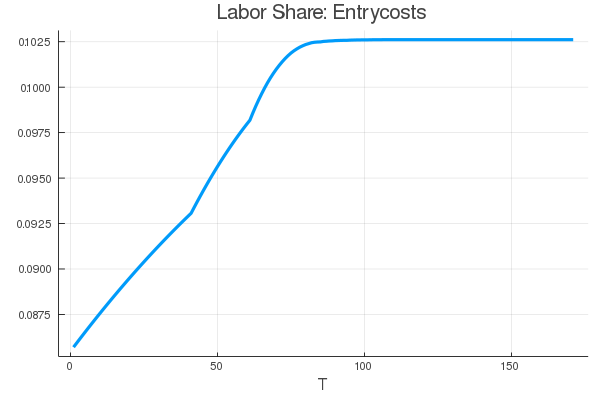

In [28]:
plot(solved.L_tilde_E, legend = false, xlabel = "T", title = "Labor Share: Entrycosts", lw = 3)

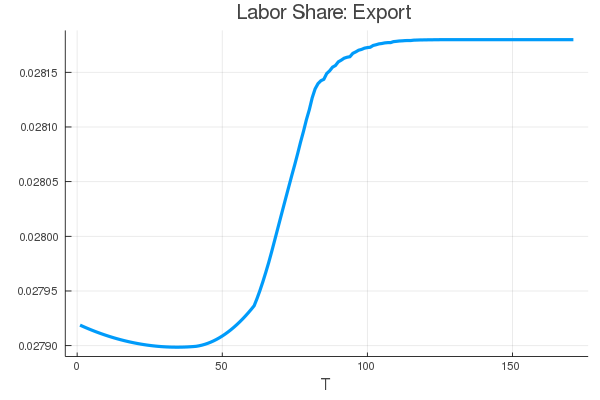

In [29]:
plot(solved.L_tilde_x, legend = false, xlabel = "T", title = "Labor Share: Export", lw = 3)

In [30]:
T = solved.t[end]
consumption_equivalent(solved.U[1], stationary_0.U_bar, parameter_defaults())

1.1080213849939073